In [13]:
import numpy as np
import pickle
from sklearn import svm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# データを用意する------------------------------------------------------------------
x = np.random.uniform(0, 10, 500)                                 # ノイズを含んだx軸を作成
y = np.random.uniform(0, 10, 500)                                 # ノイズを含んだy軸を作成
z = np.sin(x) * np.cos(y) * np.random.uniform(1, 1.5, 500)        # ノイズを含んだz値を作成
X = np.c_[x, y]                                                   # SVRが使えるように変数を結合
# ---------------------------------------------------------------------------------

In [15]:
# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='rbf', gamma='auto', epsilon=0.1)   # RBFカーネルを使用
model.fit(X, z)   

SVR(gamma='auto')

In [16]:
# 学習済モデルを使って予測
grid_line = np.arange(0, 10, 0.5)                                 # 回帰式の軸を作成
X2, Y2 = np.meshgrid(grid_line, grid_line)                        # グリッドを作成
Z2 = model.predict(np.array([X2.ravel(), Y2.ravel()]).T)          # 予測
Z2 = Z2.reshape(X2.shape)                                         # プロット用にデータshapeを変換
r2 = model.score(X, z)                                            # 決定係数算出
 
#pickleファイルを保存
#これでカレントディレクトリ(2022_01_28)にmodel.pickleができる！
#pickleファイルは拡張子を自由に決められるが、.pickleか.pklのどちらかが望ましい。
with open('model.pickle', mode='wb') as f:  # with構文でファイルパスとバイナリ書き込みモードを設定
    pickle.dump(model, f)                   # オブジェクトをシリアライズ

C:\Users\210450~1\AppData\Local\Temp/ipykernel_13228/2392889509.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig)


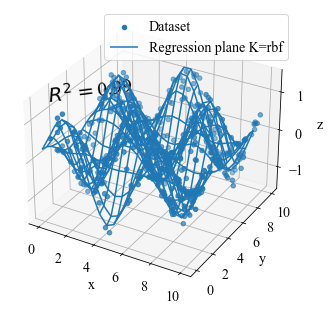

In [17]:
# ここからグラフ描画----------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
 
#  グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)
 
# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
 
# データプロットする。
ax1.scatter3D(x, y, z, label='Dataset')
ax1.plot_wireframe(X2, Y2, Z2, label='Regression plane K=rbf')
plt.legend()
 
# グラフ内に決定係数を記入
ax1.text(0.0, 0.0, 1.5, zdir=(1,1,0), s='$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)
 
# グラフを表示する。
plt.show()
plt.close()
# ---------------------------------------------------------------------------------